In [1]:
from src import esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="C_PAW") #Initialize model
model.set_cores(64) #Define number of processing cores
model.get_structure(format="poscar",path="/work/bansil/s.sevim/Test/espresso-machine/Structures/C.poscar")
model.set_pseudo(path="/work/bansil/s.sevim/Test/espresso-machine/Pseudopotentials/PBE/PAW")
model.ecutwfc(80) #Wavefunction cut-off
model.ecutrho(500) #Wavefunction cut-off
model.k_points([24,24,1]) #k mesh 
model.smearing('mv')
model.conv_thr(1e-12) #Set convergence threshold
model.ph_thr(1e-16) #Set convergence threshold
model.etot_conv_thr(10**-7) 
model.forc_conv_thr(10**-6)
model.press_conv_thr(0.01)


In [3]:
model.make_layer(layer_type='mono',direction='z')
model.cell_dof('2Dxy') #Fix cell relaxation to 2D


In [4]:
points = [
            ['GAMMA',0,0,0],
            ['M',0.5,0,0],
            ["M'",0.5,0,0.35],
            ["GAMMA'",0,0,0.35],
            ["K",0.33333,0.3333,0]
            ]

In [5]:
def workflow(model,value):
    model.job_id = f"fd_{value}"
    model.smearing('fd')
    model.optimize(calculation='vc-relax',max_iter=1) #Relax lattice constant
    model.calculate('scf')
    path = ['GAMMA','M','K','GAMMA'] #choose corners
    model.band_points(path,number=40) #define path
    model.calculate('bands')
    model.plot('electron',ylim=[-10,10]) #plot electron bands
    model.set_q(nq1=3,nq2=3,nq3=1) #Set parameters
    model.calculate('ph')
    model.calculate('q2r') #Run calculation
    model.band_points(path,number=100) #define path
    model.calculate("matdyn") #Run calculation
    model.plot('phonon',save=True,title=value) # Plot phonon band

In [6]:
import numpy as np
import copy

In [9]:
models = []
sigma = np.arange(0.01,0.03,0.005).round(3)
for i in sigma:
    temp_model = copy.deepcopy(model)
    temp_model.degauss(value=i) #degauss value
    models.append(temp_model)

Starting vc-relax iteration 1 
vc-relax for fd_0.01 is started
vc-relax for fd_0.01 is finished
vc-relax is converged after 1 steps
scf for fd_0.01 is started
scf for fd_0.01 is finished
bands for fd_0.01 is started
bands for fd_0.01 is finished
bands-pp for fd_0.01 is started
bands-pp for fd_0.01 is finished
ph for fd_0.01 is started
ph for fd_0.01 is finished
q2r for fd_0.01 is started
q2r for fd_0.01 is finished
matdyn for fd_0.01 is started
matdyn for fd_0.01 is finished


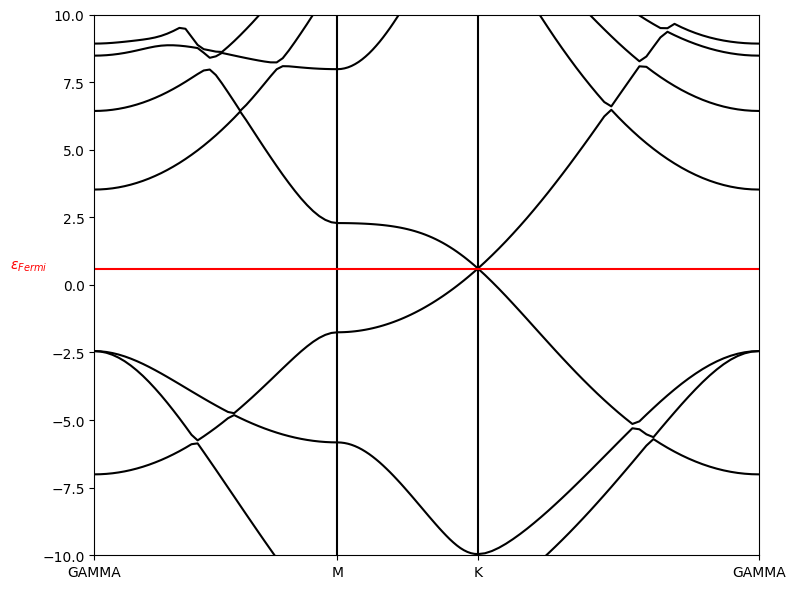

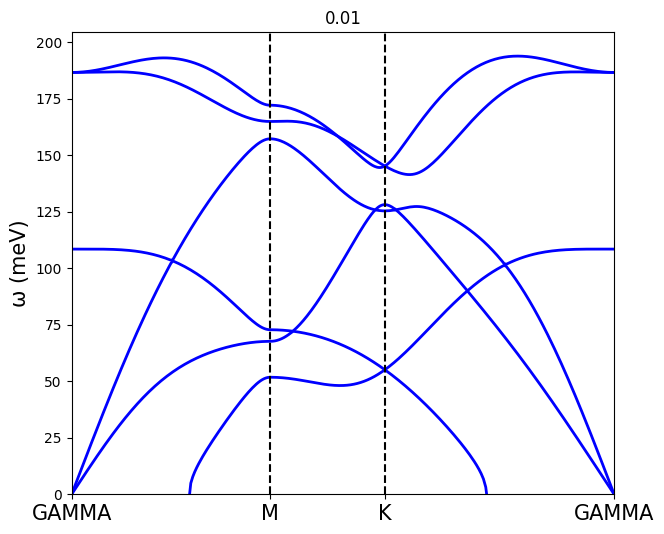

Starting vc-relax iteration 1 
vc-relax for fd_0.015 is started
vc-relax for fd_0.015 is finished
vc-relax is converged after 1 steps
scf for fd_0.015 is started
scf for fd_0.015 is finished
bands for fd_0.015 is started
bands for fd_0.015 is finished
bands-pp for fd_0.015 is started
bands-pp for fd_0.015 is finished
ph for fd_0.015 is started
ph for fd_0.015 is finished
q2r for fd_0.015 is started
q2r for fd_0.015 is finished
matdyn for fd_0.015 is started
matdyn for fd_0.015 is finished


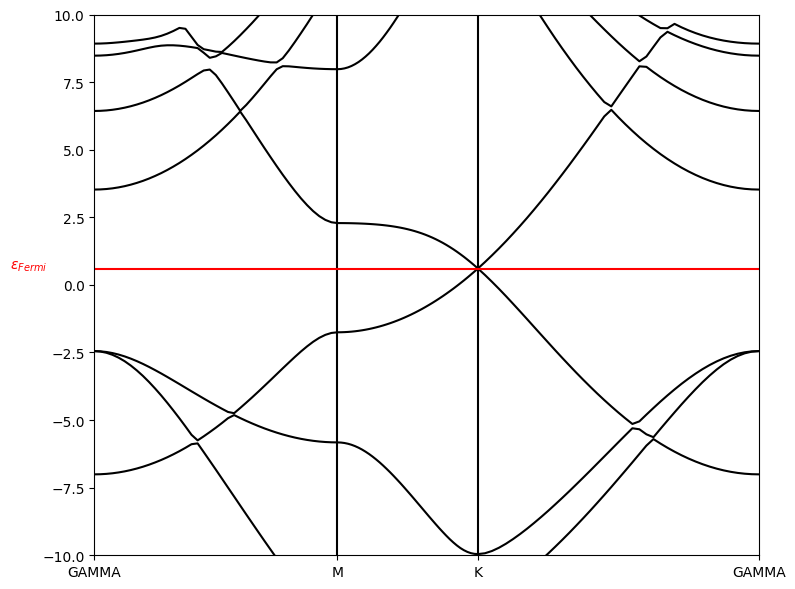

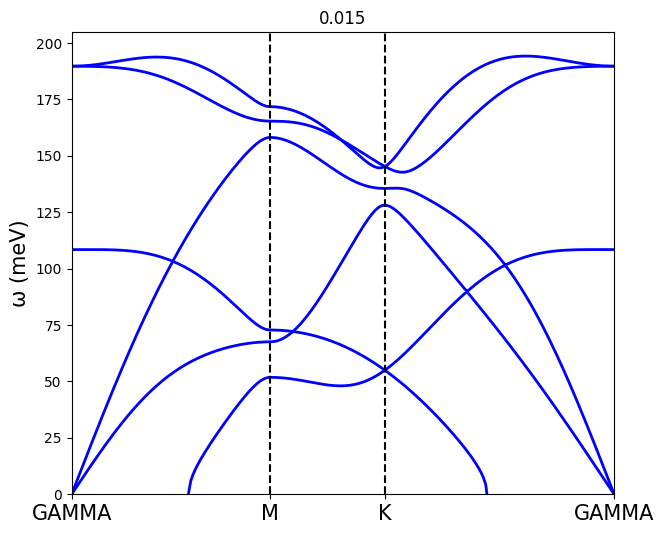

Starting vc-relax iteration 1 
vc-relax for fd_0.02 is started
vc-relax for fd_0.02 is finished
vc-relax is converged after 1 steps
scf for fd_0.02 is started
scf for fd_0.02 is finished
bands for fd_0.02 is started
bands for fd_0.02 is finished
bands-pp for fd_0.02 is started
bands-pp for fd_0.02 is finished
ph for fd_0.02 is started
ph for fd_0.02 is finished
q2r for fd_0.02 is started
q2r for fd_0.02 is finished
matdyn for fd_0.02 is started
matdyn for fd_0.02 is finished


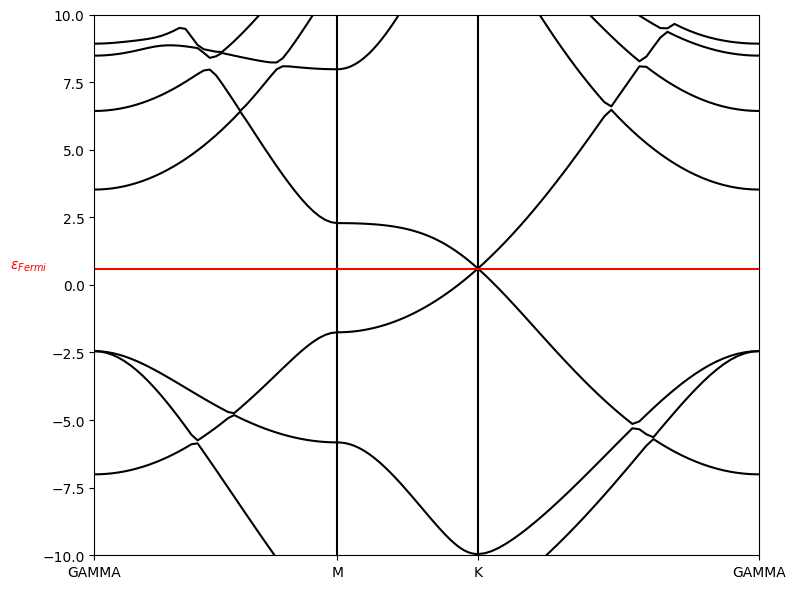

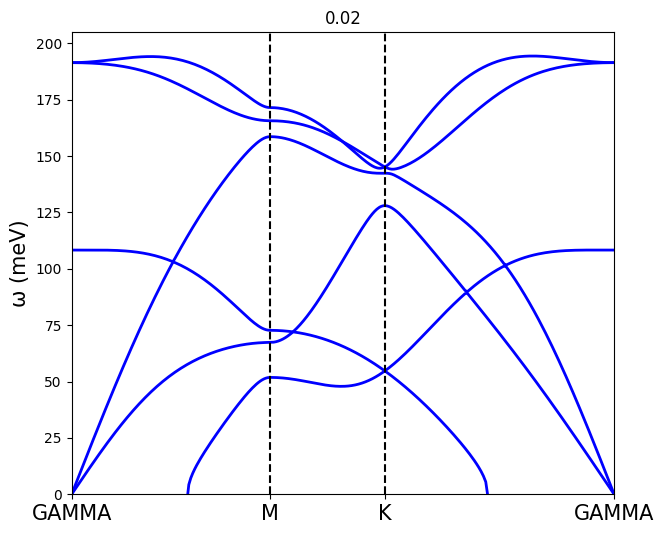

Starting vc-relax iteration 1 
vc-relax for fd_0.025 is started
vc-relax for fd_0.025 is finished
vc-relax is converged after 1 steps
scf for fd_0.025 is started
scf for fd_0.025 is finished
bands for fd_0.025 is started
bands for fd_0.025 is finished
bands-pp for fd_0.025 is started
bands-pp for fd_0.025 is finished
ph for fd_0.025 is started


/work/bansil/s.sevim/Test/espresso-machine/src/esma/compute.py:24: SyntaxWarning: invalid escape sequence '\('
  p = subprocess.Popen(f"sumpdos.x ./Projects/{self.project_id}/{self.job_id}/*\({atom}\)*\({orbital}\) > ./Projects/{self.project_id}/{self.job_id}/sumpdos_{atom}_{orbital}.dat", shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
/work/bansil/s.sevim/Test/espresso-machine/src/esma/compute.py:24: SyntaxWarning: invalid escape sequence '\)'
  p = subprocess.Popen(f"sumpdos.x ./Projects/{self.project_id}/{self.job_id}/*\({atom}\)*\({orbital}\) > ./Projects/{self.project_id}/{self.job_id}/sumpdos_{atom}_{orbital}.dat", shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
/work/bansil/s.sevim/Test/espresso-machine/src/esma/compute.py:24: SyntaxWarning: invalid escape sequence '\)'
  p = subprocess.Popen(f"sumpdos.x ./Projects/{self.project_id}/{self.job_id}/*\({atom}\)*\({orbital}\) > ./Projects/{self.project_id}/{self.job_id}/sumpdos_{atom}_{orbital}.dat", she

KeyboardInterrupt: 

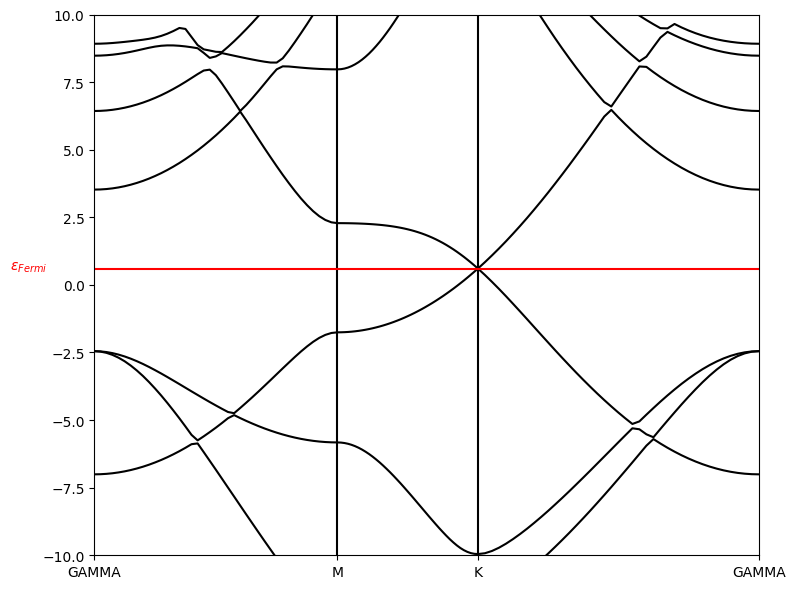

In [10]:
for i,model in enumerate(models):
    workflow(model,sigma[i])


Starting vc-relax iteration 1 
vc-relax for 0.03 is started
vc-relax for 0.03 is finished
vc-relax is converged after 1 steps
scf for 0.03 is started
scf for 0.03 is finished
bands for 0.03 is started
bands for 0.03 is finished
bands-pp for 0.03 is started
bands-pp for 0.03 is finished
ph for 0.03 is started
ph for 0.03 is finished
q2r for 0.03 is started
q2r for 0.03 is finished
matdyn for 0.03 is started
matdyn for 0.03 is finished


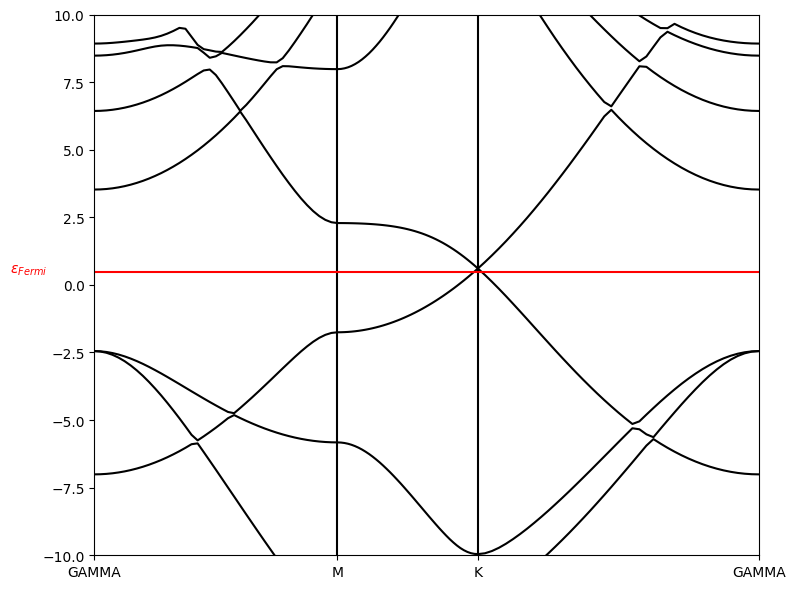

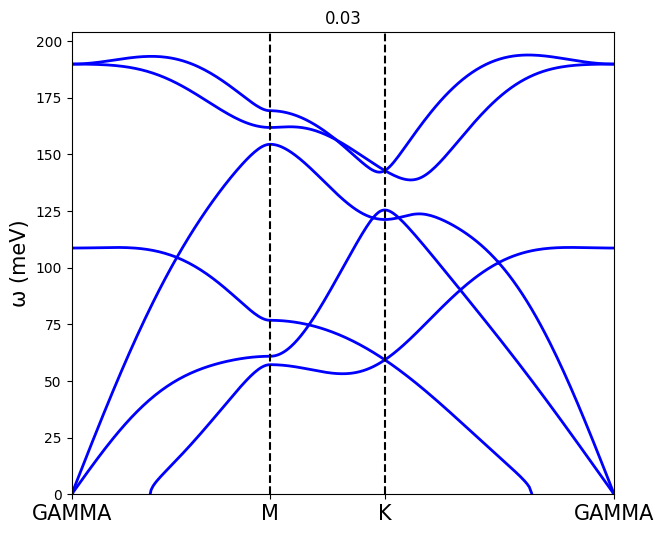

Starting vc-relax iteration 1 
vc-relax for 0.035 is started
vc-relax for 0.035 is finished
vc-relax is converged after 1 steps
scf for 0.035 is started
scf for 0.035 is finished
bands for 0.035 is started
bands for 0.035 is finished
bands-pp for 0.035 is started
bands-pp for 0.035 is finished
ph for 0.035 is started
ph for 0.035 is finished
q2r for 0.035 is started
q2r for 0.035 is finished
matdyn for 0.035 is started
matdyn for 0.035 is finished


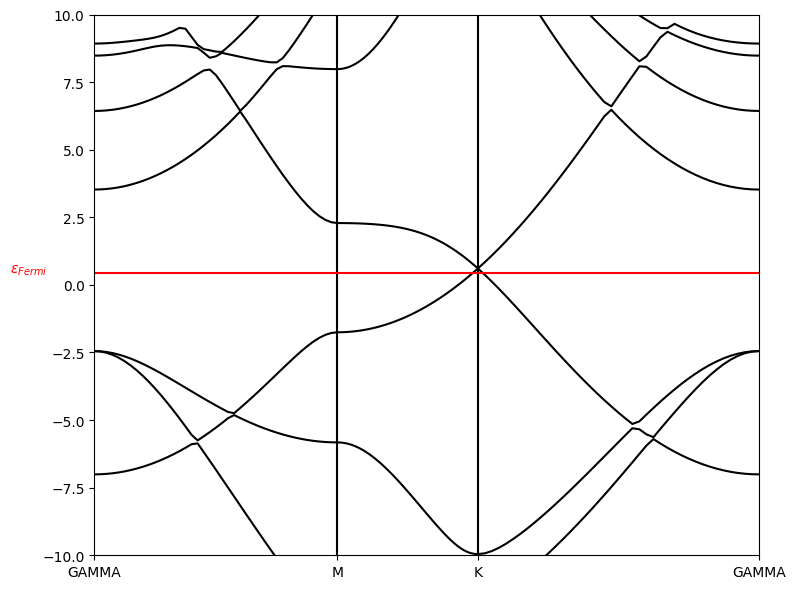

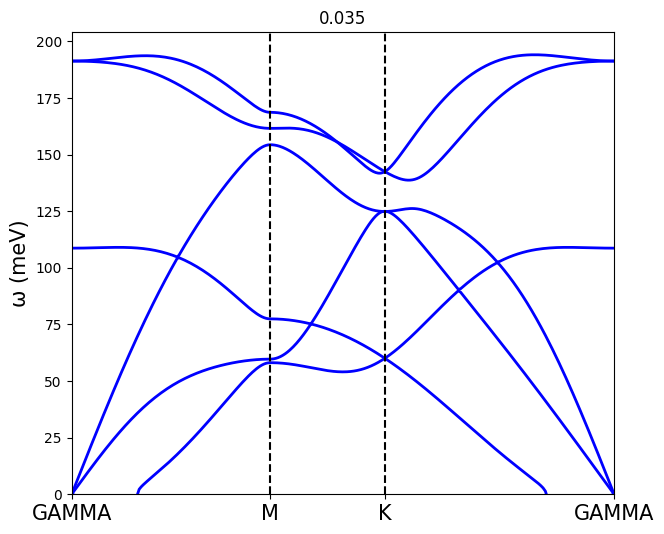

Starting vc-relax iteration 1 
vc-relax for 0.04 is started
vc-relax for 0.04 is finished
vc-relax is converged after 1 steps
scf for 0.04 is started
scf for 0.04 is finished
bands for 0.04 is started
bands for 0.04 is finished
bands-pp for 0.04 is started
bands-pp for 0.04 is finished
ph for 0.04 is started
ph for 0.04 is finished
q2r for 0.04 is started
q2r for 0.04 is finished
matdyn for 0.04 is started
matdyn for 0.04 is finished


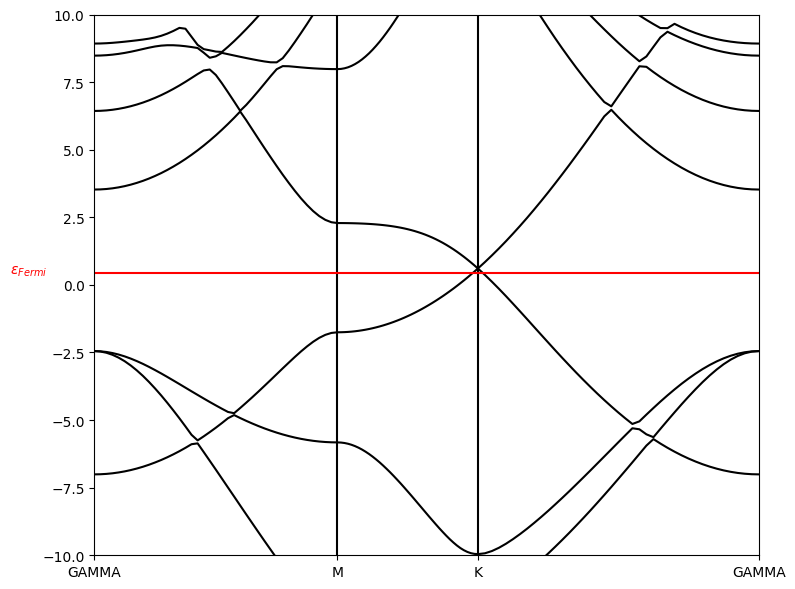

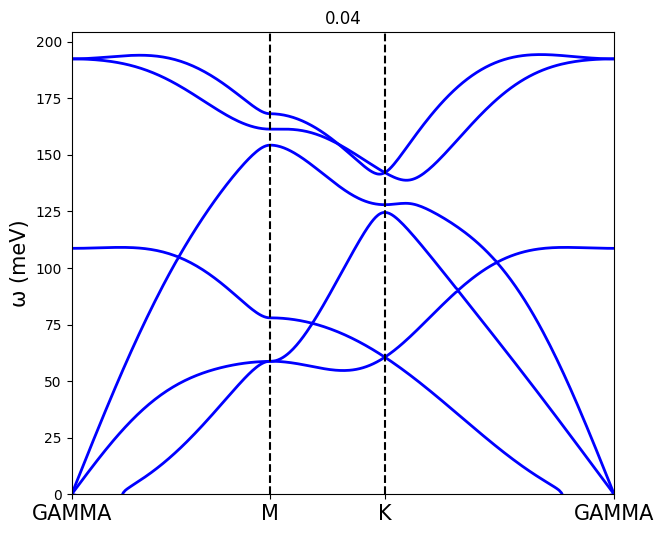

Starting vc-relax iteration 1 
vc-relax for 0.045 is started
vc-relax for 0.045 is finished
vc-relax is converged after 1 steps
scf for 0.045 is started
scf for 0.045 is finished
bands for 0.045 is started
bands for 0.045 is finished
bands-pp for 0.045 is started
bands-pp for 0.045 is finished
ph for 0.045 is started
ph for 0.045 is finished
q2r for 0.045 is started
q2r for 0.045 is finished
matdyn for 0.045 is started
matdyn for 0.045 is finished


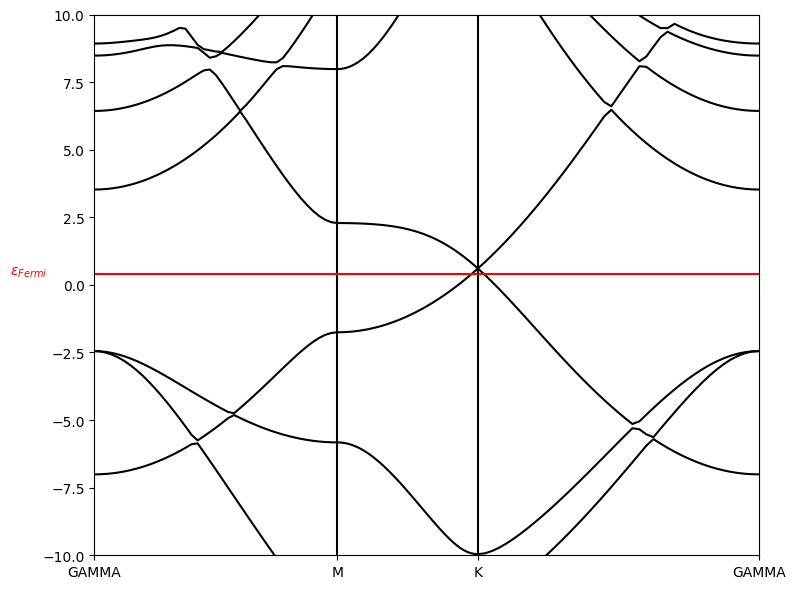

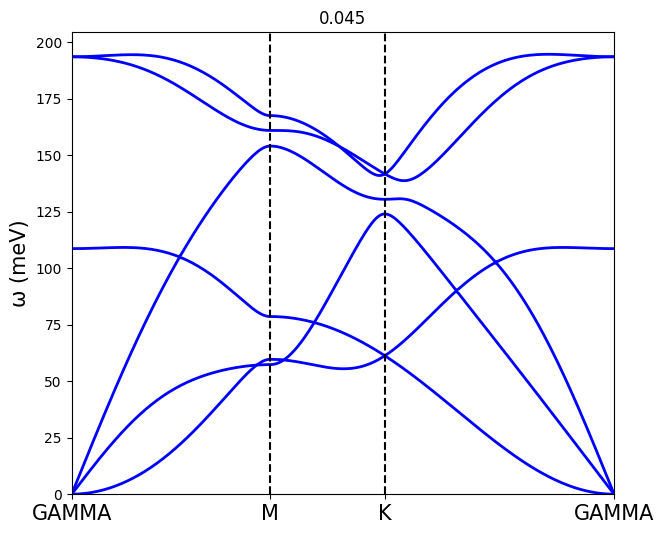

Starting vc-relax iteration 1 
vc-relax for 0.05 is started
vc-relax for 0.05 is finished
vc-relax is converged after 1 steps
scf for 0.05 is started
scf for 0.05 is finished
bands for 0.05 is started
bands for 0.05 is finished
bands-pp for 0.05 is started
bands-pp for 0.05 is finished
ph for 0.05 is started
ph for 0.05 is finished
q2r for 0.05 is started
q2r for 0.05 is finished
matdyn for 0.05 is started
matdyn for 0.05 is finished


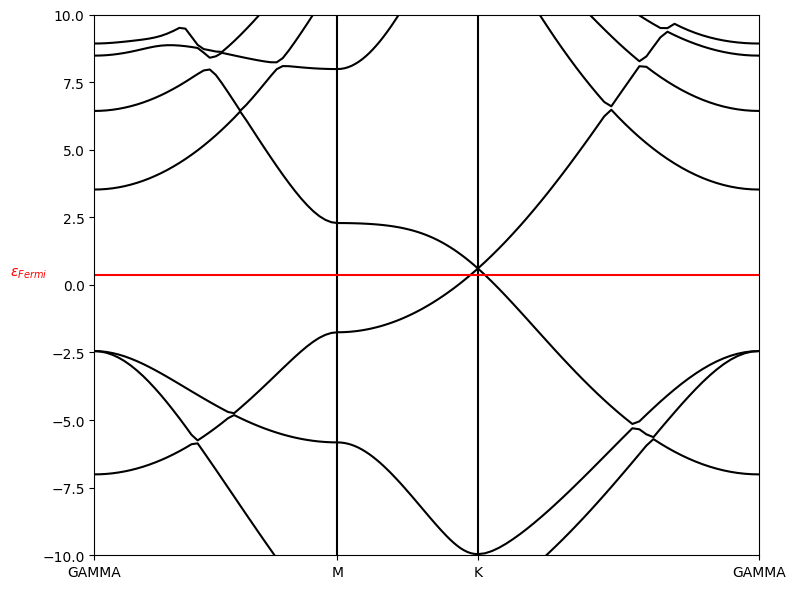

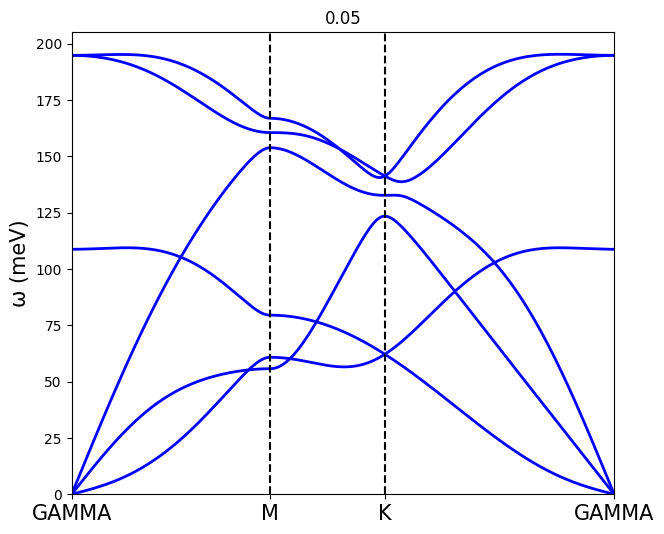

In [8]:
for i,model in enumerate(models):
    workflow(model,sigma[i])
